# Reading dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
from scipy.stats import chi2_contingency

In [2]:
#read csv
initial_test_data = pd.read_csv("test.csv")
initial_train_data = pd.read_csv("train.csv")
initial_gender_data = pd.read_csv("gender_submission.csv")

In [3]:
initial_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Finding categories of different columns

In [4]:
len(initial_train_data['PassengerId'].unique())

891

In [5]:
initial_train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [6]:
len(initial_train_data['Name'].unique())

891

In [7]:
initial_train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [8]:
len(initial_train_data['Age'].unique())

89

In [9]:
initial_train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [10]:
initial_train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [11]:
len(initial_train_data['Ticket'].unique())

681

In [12]:
initial_train_data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [13]:
len(initial_train_data['Cabin'].unique())

148

In [14]:
initial_train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Feature engineering (Along with hyper pruning)

## After initial analysis of the dataset, we see that follwoing fields are unique and does not contribute to survival of the passenger:
1> Name
2> PassengerId
So we will drop these fields

In [15]:
initial_train_data.drop(columns=['Name','PassengerId'], inplace=True)

## Removing NaN from dataset

Columns having NaN will be replaced with proper values. The dataset should not have any cell as NaN

## Filling the age value not available with median of all ages (A part of hyper pruning which was figured out with experimentation with data)

In [16]:
median_age = initial_train_data['Age'].median()
median_age

28.0

In [17]:
initial_train_data.loc[initial_train_data['Age'].isna(), 'Age'] = round(median_age)

In [18]:
initial_train_data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

## One Hot encoding for Embarked

In [19]:
initial_train_data['Embarked'].isna().sum()

2

In [20]:
initial_train_data = pd.get_dummies(initial_train_data, columns=['Embarked'], drop_first=False)
initial_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,1,1,female,35.0,1,0,113803,53.1000,C123,False,False,True
4,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,False,False,True
887,1,1,female,19.0,0,0,112053,30.0000,B42,False,False,True
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,1,1,male,26.0,0,0,111369,30.0000,C148,True,False,False


In [21]:
mapping_boolean = {False: 0, True: 1}
initial_train_data['Embarked_Q'] = initial_train_data['Embarked_Q'].map(mapping_boolean)
initial_train_data['Embarked_S'] = initial_train_data['Embarked_S'].map(mapping_boolean)
initial_train_data['Embarked_C'] = initial_train_data['Embarked_C'].map(mapping_boolean)
initial_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,1,female,35.0,1,0,113803,53.1000,C123,0,0,1
4,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,1,1,female,19.0,0,0,112053,30.0000,B42,0,0,1
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,1,1,male,26.0,0,0,111369,30.0000,C148,1,0,0


## Labelling Sex

In [22]:
mapping = {'male': 0, 'female': 1}
initial_train_data['Sex'] = initial_train_data['Sex'].map(mapping)
initial_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,1,1,1,35.0,1,0,113803,53.1000,C123,0,0,1
4,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,13.0000,NaN,0,0,1
887,1,1,1,19.0,0,0,112053,30.0000,B42,0,0,1
888,0,3,1,28.0,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,1,1,0,26.0,0,0,111369,30.0000,C148,1,0,0


## Factorization Heat map with the fields 

Text(0.5, 1.0, 'Correlation Heatmap')

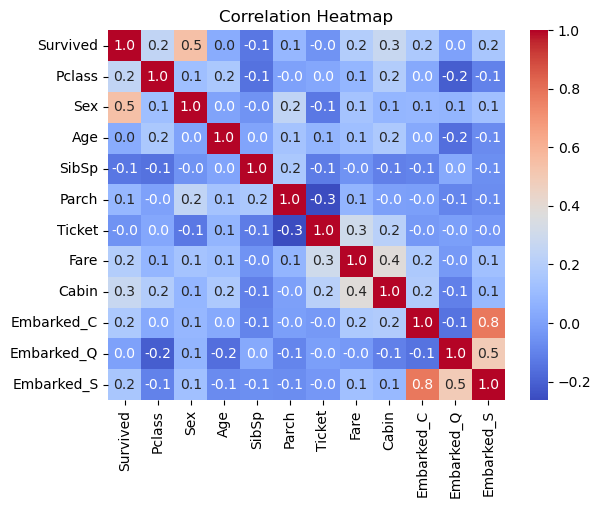

In [23]:
initial_train_data_encoded = initial_train_data.apply(lambda x: pd.factorize(x)[0])
sns.heatmap(initial_train_data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Heatmap')

## From the correlation matrix, we see that the following fields are not correlated with 'Survived'. 
1> Age,
2> Ticket
3> Embarked_Q

## We will drop 'Ticket' here since it is not categorical and check with correlation heatmap for 'Age' and 'Embarked_Q'

In [24]:
initial_train_data.drop(columns=['Ticket'], inplace=True)

In [25]:
initial_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,1,38.0,1,0,71.2833,C85,1,0,0
2,1,3,1,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,1,35.0,1,0,53.1000,C123,0,0,1
4,0,3,0,35.0,0,0,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,NaN,0,0,1
887,1,1,1,19.0,0,0,30.0000,B42,0,0,1
888,0,3,1,28.0,1,2,23.4500,NaN,0,0,1
889,1,1,0,26.0,0,0,30.0000,C148,1,0,0


## Performing Chi-square test for 'Cabin'

In [26]:
# Create a contingency table
contingency_table = pd.crosstab(initial_train_data['Survived'], initial_train_data['Cabin'])
# Perform the chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)
print("Chi-value: ",chi2)
print(" P-value: ", p)

Chi-value:  161.25
 P-value:  0.18357354976388165


## We see a relatively higher Chi2 value but the P-value is less. Also, 'Cabin' is not a categorical column. So, we will drop this column

In [27]:
initial_train_data.drop(columns=['Cabin'], inplace=True)

In [28]:
initial_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,1,28.0,1,2,23.4500,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [29]:
initial_gender_data

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
y = initial_train_data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Correlation Heatmap

<Axes: >

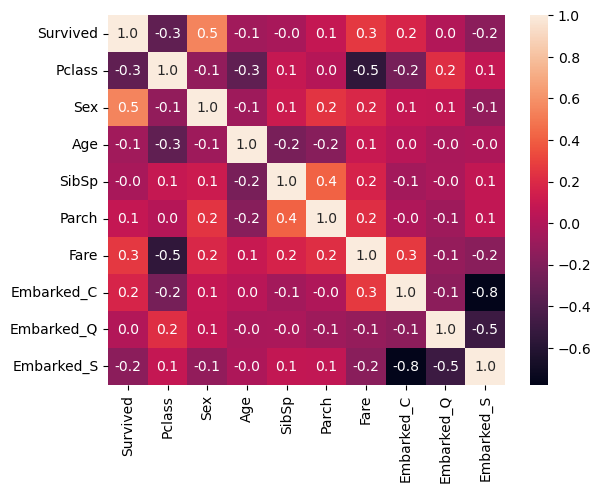

In [31]:
sns.heatmap(initial_train_data.corr(), annot=True, fmt=".1f")

## Correlation heat map shows that the following columns are not correlated to 'Survived'. Drop those columns:
1> SibSp, 
2> Embarked_Q

In [32]:
initial_train_data.drop(columns=['SibSp','Embarked_Q'], inplace=True)

## Remove y-axis/target column from dataset

In [33]:
initial_train_data.drop(columns=['Survived'], inplace=True)
initial_train_data

,Pclass,Sex,Age,Parch,Fare,Embarked_C,Embarked_S
0,3,0,22.0,0,7.2500,0,1
1,1,1,38.0,0,71.2833,1,0
2,3,1,26.0,0,7.9250,0,1
3,1,1,35.0,0,53.1000,0,1
4,3,0,35.0,0,8.0500,0,1
...,...,...,...,...,...,...,...
886,2,0,27.0,0,13.0000,0,1
887,1,1,19.0,0,30.0000,0,1
888,3,1,28.0,2,23.4500,0,1
889,1,0,26.0,0,30.0000,1,0


In [34]:
X = initial_train_data
X.shape

(891, 7)

## Splitting the dataset into test and train for finding accuracy score 


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,random_state = 65)

In [36]:
print ("Shape of training dataset: ",X_train.shape)
print ("Shape of testing dataset: ",X_test.shape)

Shape of training dataset:  (757, 7)
Shape of testing dataset:  (134, 7)


# Decision Tree Classifier 
Keeping the Criteria as Entropy

Random state is kept as 65(experimental)

In [37]:
clf = DecisionTreeClassifier(criterion='entropy')

In [38]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.835820895522388

In [40]:
print ("Accuracy is:", accuracy*100,"%")

Accuracy is: 83.5820895522388 %


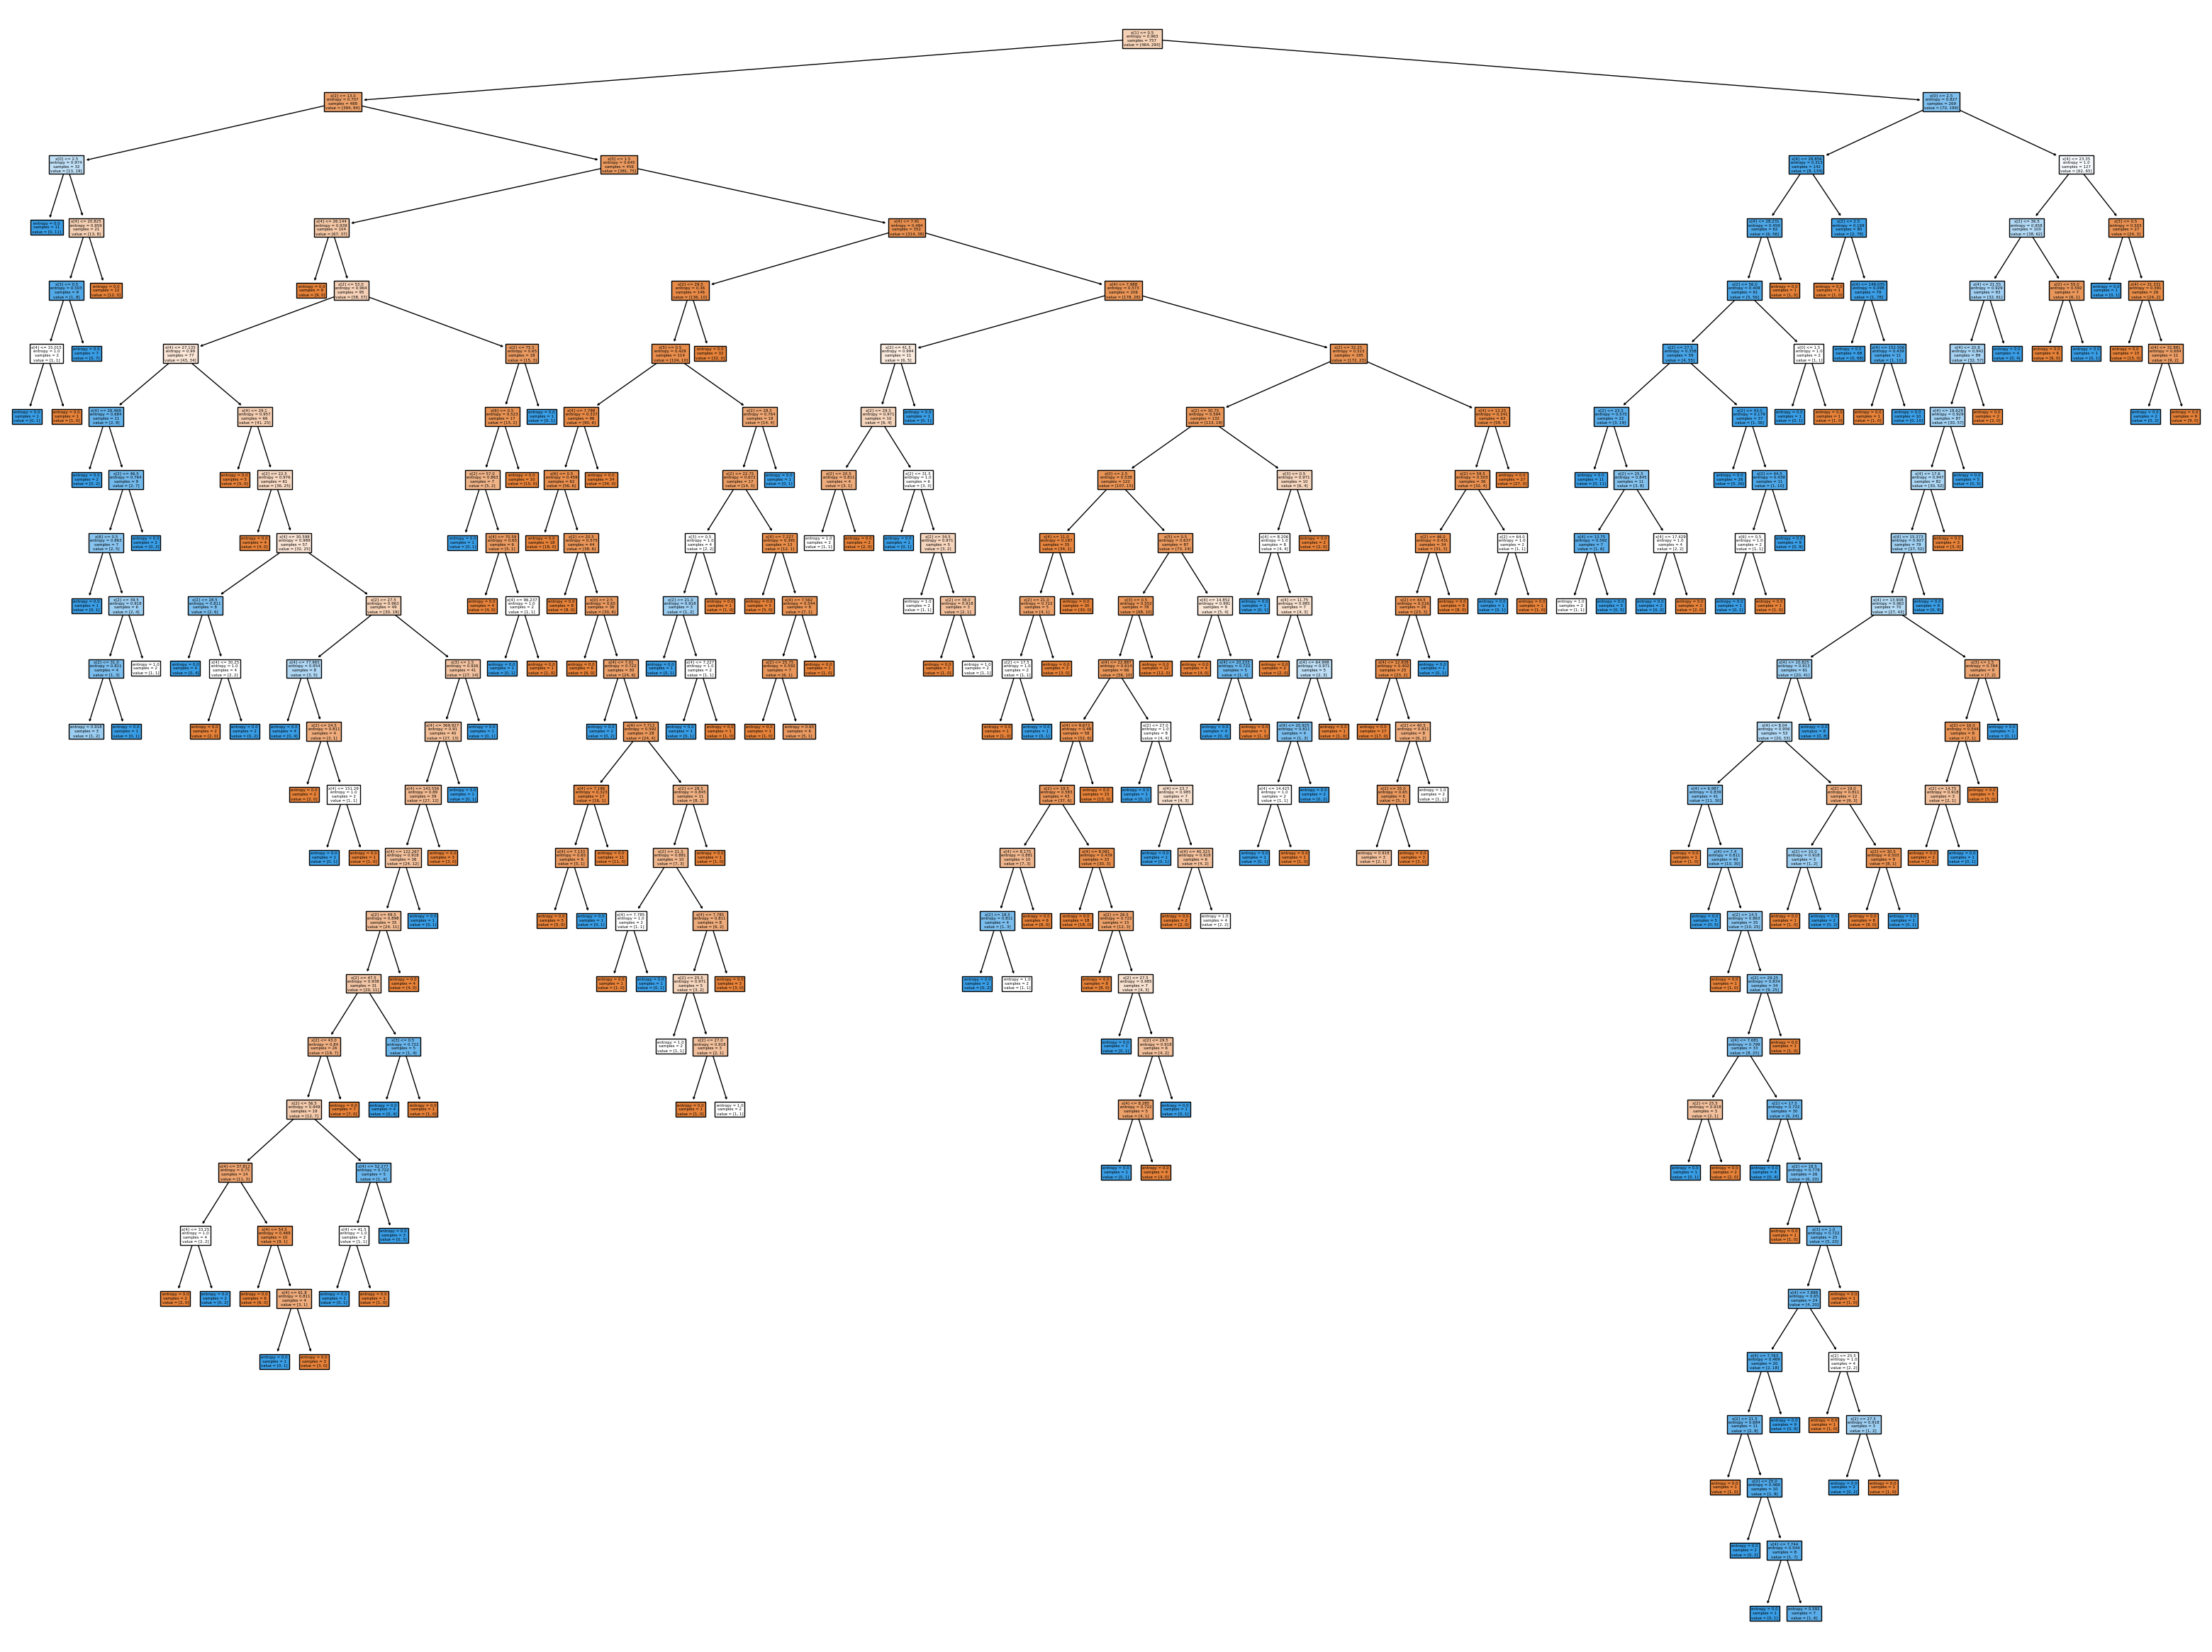

In [41]:
plt.figure(figsize=(40,30))  # Adjust the figure size as needed
plot_tree(clf, filled=True)
plt.show()

# Random forest classifier
Random state is kept as 87 (experimental)

In [42]:
clfr = RandomForestClassifier(n_estimators=100,random_state=87)

In [43]:
clfr.fit(X_train, y_train)

RandomForestClassifier(random_state=87)

In [44]:
y_pred = clfr.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy is:", accuracy*100,"%")

Accuracy is: 84.32835820895522 %


# Decision Tree vs Random Forest Classifier
Comparing accuracy or Decision Tree and Random Forest, we find that Decision Tree is providing slight lesser accuracy after experimenting with multiple randomness. So we select Random Forest Classifier model for this dataset 

# Predict values in testing dataset

In [46]:
initial_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [47]:
# Required columns in test data to predict the value. 
# The columns the dataframe given for prediction should eb same and in order to the columns in test dataframe

required_columns = ['Pclass','Sex','Age','Parch','Fare','Embarked']
predicting_dataframe = initial_test_data[required_columns].copy()

In [48]:
## One Hot encoding for Embarked

predicting_dataframe['Embarked'].isna().sum()

predicting_dataframe = pd.get_dummies(predicting_dataframe, columns=['Embarked'], drop_first=False)
predicting_dataframe.drop(columns=['Embarked_Q'], inplace=True)
predicting_dataframe

,Pclass,Sex,Age,Parch,Fare,Embarked_C,Embarked_S
0,3,male,34.5,0,7.8292,False,False
1,3,female,47.0,0,7.0000,False,True
2,2,male,62.0,0,9.6875,False,False
3,3,male,27.0,0,8.6625,False,True
4,3,female,22.0,1,12.2875,False,True
...,...,...,...,...,...,...,...
413,3,male,NaN,0,8.0500,False,True
414,1,female,39.0,0,108.9000,True,False
415,3,male,38.5,0,7.2500,False,True
416,3,male,NaN,0,8.0500,False,True


In [49]:
# Mapping the categorical values

mapping_sex = {'male': 0, 'female': 1}
predicting_dataframe['Sex'] = predicting_dataframe['Sex'].map(mapping_sex)
mapping_boolean = {False: 0, True: 1}
predicting_dataframe['Embarked_S'] = predicting_dataframe['Embarked_S'].map(mapping_boolean)
predicting_dataframe['Embarked_C'] = predicting_dataframe['Embarked_C'].map(mapping_boolean)

In [50]:
predicting_dataframe

,Pclass,Sex,Age,Parch,Fare,Embarked_C,Embarked_S
0,3,0,34.5,0,7.8292,0,0
1,3,1,47.0,0,7.0000,0,1
2,2,0,62.0,0,9.6875,0,0
3,3,0,27.0,0,8.6625,0,1
4,3,1,22.0,1,12.2875,0,1
...,...,...,...,...,...,...,...
413,3,0,NaN,0,8.0500,0,1
414,1,1,39.0,0,108.9000,1,0
415,3,0,38.5,0,7.2500,0,1
416,3,0,NaN,0,8.0500,0,1


In [51]:
predicted_values = clf.predict(predicting_dataframe)

In [52]:
initial_test_data['Survived'] = predicted_values

In [53]:
new_order = ['PassengerId','Survived','Pclass','Name','Sex','Age',
             'SibSp','Parch','Ticket','Fare','Cabin','Embarked']

# Final dataframe

In [54]:
initial_test_data[new_order]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,1,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,1,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
